# What Happens in a Day

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [6]:
nyc_data = pd.read_csv("/data/bikeshare/data/unified/nyc.csv")
boston_data = pd.read_csv("/data/bikeshare/data/unified/boston.csv")
main_data = pd.read_csv("/data/bikeshare/data/unified/merged.csv")

In [7]:
nyc = {'name':'New York City', 'data':nyc_data}
boston = {'name':'Boston', 'data':boston_data}
main = {'name':'All Data', 'data':main_data}

## Riders by Hour of Day

In [27]:
def riders_by_hour(data):
    n = 10000
    sample = data['data'].sample(n)
    times = pd.DatetimeIndex(pd.to_datetime(sample.start_time))
    age = (2018 - sample.birth_year)
    d = sample.groupby([times.hour]).duration.count()
    plt.bar(d.index, d/n)
    axes = plt.gca()
    plt.xlabel("Hour of Day")
    plt.ylabel("Percentage")
    axes.set_xlim([0,23])
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/riders_by_hour_'+data['name']+'.png')
    plt.show()
    

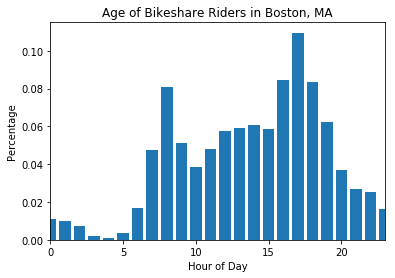

In [28]:
riders_by_hour(boston)

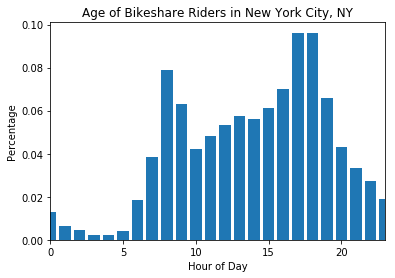

In [29]:
riders_by_hour(nyc)

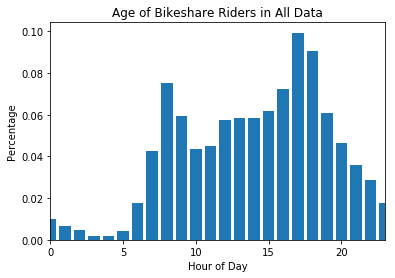

In [30]:
riders_by_hour(main)

## Gender of Users
How does bikeshare service usage differ by gender?

In [31]:
def users_by_gender(data):
    x = data['data'].gender.value_counts().index
    y = data['data'].gender.value_counts()
    count = data['data'].gender.count()
    plt.bar(x, y/count)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.ylabel("Ratio out of {} riders".format(count))
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/users_by_gender '+data['name']+'.png')
    plt.show()
    